In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline


Sources

1. https://www.datacamp.com/community/tutorials/introduction-factor-analysis
2. https://buildmedia.readthedocs.org/media/pdf/factor-analyzer/latest/factor-analyzer.pdf

# Prepare dataframe

In [2]:
base_dir = os.path.dirname(os.getcwd())
df = pd.read_csv(os.path.join(base_dir, 'Data', 'post_convo_survey',
                              'strangers', 'data_common_questions.csv'))


In [3]:
df.head()

,subID,partnerID,convo_flow,convo_enjoy,friends,speak,knew_before,knew_before_text,know_now,common,similar,attractive,attracted_to,extraverted,fun,disclosed,comfortable_self,convo_order,round_robin_num,dyad
0,1,2,66,58,63,10,58,We're both sophomores in the same sorority,69,44,58,74,45,70,62,57,57,1,1,14
1,1,4,100,87,94,67,0,NaN,65,58,37,55,49,36,60,55,88,2,1,34
2,1,3,88,74,79,65,0,NaN,71,58,72,88,53,57,70,37,62,3,1,23
3,1,5,96,93,100,80,78,freshman friends,74,82,88,63,52,61,73,79,92,4,1,42
4,1,6,90,87,89,44,66,sorority,68,28,27,64,53,90,65,92,61,5,1,54


In [4]:
df.drop(['knew_before_text', 'convo_order', 'round_robin_num', 'dyad',
        'subID', 'partnerID'],axis=1,inplace=True)

In [5]:
df.head()

,convo_flow,convo_enjoy,friends,speak,knew_before,know_now,common,similar,attractive,attracted_to,extraverted,fun,disclosed,comfortable_self
0,66,58,63,10,58,69,44,58,74,45,70,62,57,57
1,100,87,94,67,0,65,58,37,55,49,36,60,55,88
2,88,74,79,65,0,71,58,72,88,53,57,70,37,62
3,96,93,100,80,78,74,82,88,63,52,61,73,79,92
4,90,87,89,44,66,68,28,27,64,53,90,65,92,61


# Adequacy Test

- Bartlett should be sig
- KMO should be greater than .6

In [6]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(5446.233080858038, 0.0)

In [7]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.892794394696513

# Choose number of factors

In [8]:
fa = FactorAnalyzer(rotation=None)
fa.fit(df)
ev, v = fa.get_eigenvalues()
ev

array([6.2568512 , 1.38103418, 1.16342854, 1.07478661, 0.84099805,
       0.67547634, 0.65811988, 0.53415472, 0.37634368, 0.31191201,
       0.28000167, 0.19605091, 0.16291821, 0.087924  ])

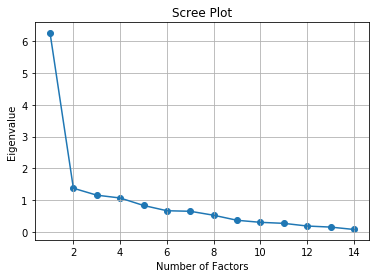

In [9]:
# Create scree plot
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.grid()
#plt.savefig(os.path.join(base_dir,'figures','scree_plot.png'), dpi=300)
plt.show()


# Perform factor analysis

In [10]:
fa = FactorAnalyzer(n_factors=4, rotation="varimax")
fa.fit(df)
fa.loadings_

array([[ 0.86720403,  0.18111095,  0.02673762,  0.17974372],
       [ 0.9214533 ,  0.18445479,  0.08336973,  0.1126667 ],
       [ 0.8058161 ,  0.26430948,  0.30450626, -0.11885984],
       [-0.03082225, -0.07524522, -0.02730887, -0.3482208 ],
       [ 0.1127814 ,  0.46356016,  0.13949859, -0.01570687],
       [ 0.24114082,  0.8852591 ,  0.12206855,  0.13391269],
       [ 0.6487169 ,  0.33023512,  0.23495198, -0.244724  ],
       [ 0.67915246,  0.27030882,  0.33059588, -0.29684147],
       [ 0.33154332,  0.06420302,  0.58422257, -0.00816035],
       [ 0.00243935,  0.06853594,  0.24556777,  0.01526219],
       [ 0.46735329,  0.05960482,  0.41758829,  0.27833265],
       [ 0.82685988,  0.14146879,  0.29177948,  0.23903195],
       [ 0.19407825,  0.46037888,  0.02770929,  0.27559972],
       [ 0.76799956,  0.16342509,  0.03359081,  0.13657399]])

In [11]:
loadings = pd.DataFrame(fa.loadings_)
loadings['item'] = pd.DataFrame(df.columns)
loadings = loadings.set_index('item')

Text(41.09374999999999, 0.5, 'item')

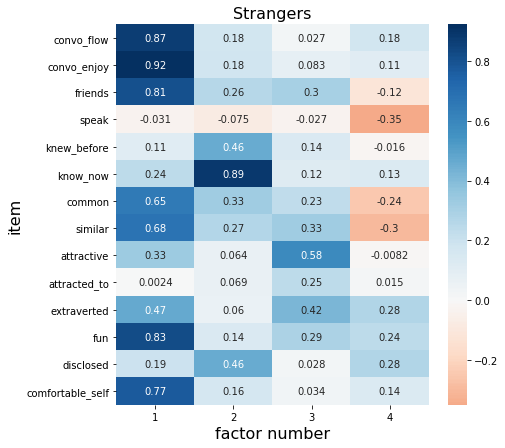

In [12]:
plt.figure(figsize=(7,7))
xticklabels = ['1', '2', '3', '4']
ax = sns.heatmap(loadings, annot=True, cmap='RdBu', center=0, xticklabels=xticklabels)

plt.title('Strangers', fontsize=16)
plt.xlabel('factor number', fontsize=16)
plt.ylabel('item', fontsize=16)

plt.tight_layout()
plt.savefig(os.path.join(base_dir, 'Figures', 'factor_loadings_strangers.png'), dpi=300)

In [13]:
fa.get_factor_variance()
# SS Loadings
# Proportion Variance
# Cumulative Variance

(array([4.84389184, 1.5940817 , 0.96302285, 0.57608351]),
 array([0.34599227, 0.11386298, 0.06878735, 0.04114882]),
 array([0.34599227, 0.45985525, 0.5286426 , 0.56979142]))

# Get scores per convo

In [14]:
scores = fa.transform(df)
factor_loadings = pd.DataFrame(scores)
factor_loadings.columns = ['factor_1', 'factor_2', 'factor_3', 'factor_4']

In [15]:
data = pd.read_csv(os.path.join(base_dir, 'Data', 'post_convo_survey',
                              'strangers', 'data_common_questions.csv'))
data.drop(['knew_before_text',],axis=1,inplace=True)


In [16]:
data_with_factors = pd.concat([data, factor_loadings], axis=1)

In [17]:
data_with_factors.to_csv(os.path.join(base_dir, 'Analyses',
                              'post_convo_survey_with_factors_strangers.csv'),
                        encoding='utf-8', index=False)

In [18]:
data_with_factors.head()

,subID,partnerID,convo_flow,convo_enjoy,friends,speak,knew_before,know_now,common,similar,...,fun,disclosed,comfortable_self,convo_order,round_robin_num,dyad,factor_1,factor_2,factor_3,factor_4
0,1,2,66,58,63,10,58,69,44,58,...,62,57,57,1,1,14,-1.045410,1.414278,1.272922,0.661494
1,1,4,100,87,94,67,0,65,58,37,...,60,55,88,2,1,34,0.349721,1.244863,-0.757385,-0.067469
2,1,3,88,74,79,65,0,71,58,72,...,70,37,62,3,1,23,-0.161106,1.238062,0.993580,-0.383749
3,1,5,96,93,100,80,78,74,82,88,...,73,79,92,4,1,42,0.750656,1.781739,0.295518,-1.095975
4,1,6,90,87,89,44,66,68,28,27,...,65,92,61,5,1,54,-0.203720,1.266936,0.387775,1.439496
